In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from collections import Counter
import statistics
import numpy as np
import pandas as pd
from PSO import BasePSO
from load_save import *
from objective_function import obj_fun1
from sklearn.model_selection import train_test_split

In [97]:
#loading three datasets
df1 = pd.read_excel('./Dataset/dataset1.xlsx')
df2 = pd.read_excel('./Dataset/dataset2.xlsx').drop('Timestamp', axis=1)
df3 = pd.read_excel('./Dataset/dataset3.xlsx').drop(['Flow ID', ' Source IP', ' Destination IP',' Timestamp'], axis=1)

print('Dataset-1 :', df1.head())
print('Dataset-2 :', df2.head())
print('Dataset-3 :', df3.head())

Dataset-1 :    PktRoundedTime  NumPkts  NumBytes  PktSizeH  PktSizeAvg  PktSizeStd  \
0              21     12.0    3180.0  1.329661       265.0   186.96232   
1              22      9.0    1485.0  0.000000       165.0     0.00000   
2              23      NaN       NaN       NaN         NaN         NaN   
3              24      NaN       NaN       NaN         NaN         NaN   
4              25      NaN       NaN       NaN         NaN         NaN   

   NumIPProto  IPProtoAvg  IPProtoStd  IPProtoTCP  ...  ULDurationAvg  \
0         1.0         6.0         0.0         1.0  ...       0.283386   
1         0.0         NaN         NaN         0.0  ...       0.783386   
2         NaN         NaN         NaN         NaN  ...       1.283386   
3         NaN         NaN         NaN         NaN  ...       1.783386   
4         NaN         NaN         NaN         NaN  ...       2.283386   

   ULDurationStd  DLCumNumPktsAvg  DLCumNumPktsStd  DLCumBytesAvg  \
0       0.000762              2.0  

In [98]:
#Descriptive analysis
Des1 = df1.describe()
Des2 = df2.describe()
Des3 = df3.describe()

print('Descriptive for Dataset-1', Des1)
print('Descriptive for Dataset-2', Des2)
print('Descriptive for Dataset-3', Des3)

Descriptive for Dataset-1        PktRoundedTime      NumPkts      NumBytes     PktSizeH   PktSizeAvg  \
count     2000.000000  1839.000000  1.839000e+03  1839.000000  1839.000000   
mean     25490.500000   405.092985  3.606006e+05     1.537771   502.420188   
std      24977.913871   664.175557  7.162754e+05     0.796714   398.605340   
min         21.000000     1.000000  6.000000e+01     0.000000    60.000000   
25%        520.750000    18.000000  2.342000e+03     1.002718   107.846972   
50%      25490.500000    74.000000  2.443200e+04     1.612441   411.714286   
75%      50460.250000   506.000000  4.508820e+05     1.970932   872.569983   
max      50960.000000  4090.000000  5.761092e+06     4.256548  2251.166667   

        PktSizeStd   NumIPProto   IPProtoAvg   IPProtoStd   IPProtoTCP  ...  \
count  1798.000000  1839.000000  1768.000000  1753.000000  1839.000000  ...   
mean    935.169441     1.379010     7.666965     1.496771     0.786251  ...   
std     885.131765     0.578369   

In [99]:
Dub1 = df1.duplicated().sum()
Dub2 = df2.duplicated().sum()
Dub3 = df3.duplicated().sum()

print(Dub1)
print(Dub2)
print(Dub3)

0
971
0


In [123]:
print('Dataset-1 :', Counter(df1['Label']))
print('Dataset-2 :', Counter(df2['Label']))
print('Dataset-3 :', Counter(df3['Label']))

Dataset-1 : Counter({'BENIGN': 1000, 'DDoS LOIT': 1000})
Dataset-2 : Counter({'Benign': 1000, 'FTP-BruteForce': 1000})
Dataset-3 : Counter({'TFTP': 309, 'BENIGN': 275})


           Count
Label           
BENIGN      1000
DDoS LOIT   1000


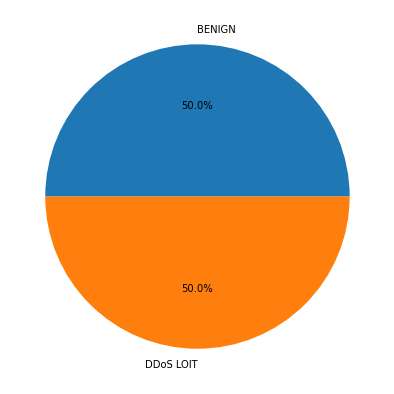

In [101]:
# Pie chart for Dataset-1
Label_1 = df1[['Label', 'Count']]
pie_1 = Label_1.groupby(['Label']).agg('count')
Label_1 = Label_1.drop('Count', axis=1)
print (pie_1)
Data = pie_1.Count.sort_values().index
Value = pie_1.Count.sort_values()
plt.figure(1, figsize=(7,7))
type_Malware = plt.pie(Value, labels=Data, autopct='%1.1f%%', shadow=False)
plt.show()

                Count
Label                
Benign           1000
FTP-BruteForce   1000


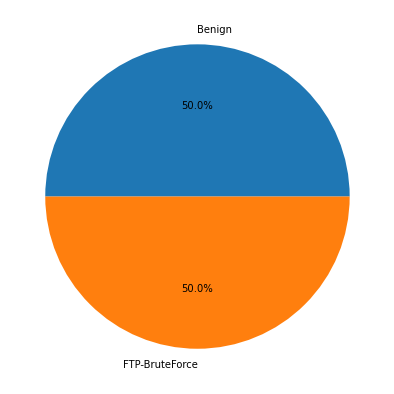

In [102]:
# Pie chart for Dataset-2
Label_2 = df2[['Label', 'Count']]
pie_2 = Label_2.groupby(['Label']).agg('count')
Label_2 = Label_2.drop('Count', axis=1)
print (pie_2)
Data = pie_2.Count.sort_values().index
Value = pie_2.Count.sort_values()
plt.figure(1, figsize=(7,7))
type_Malware = plt.pie(Value, labels=Data, autopct='%1.1f%%', shadow=False)
plt.show()

        Count
Label        
BENIGN    275
TFTP      309


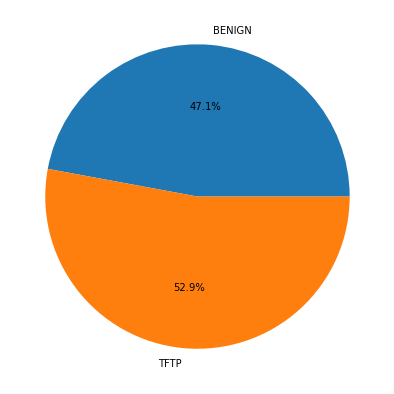

In [103]:
# Pie chart for Dataset-3
Label_3 = df3[['Label', 'Count']]
pie_3 = Label_3.groupby(['Label']).agg('count')
Label_3 = Label_3.drop('Count', axis=1)
print (pie_3)
Data = pie_3.Count.sort_values().index
Value = pie_3.Count.sort_values()
plt.figure(1, figsize=(7,7))
type_Malware = plt.pie(Value, labels=Data, autopct='%1.1f%%', shadow=False)
plt.show()

In [104]:
# Data normalization for Dataset-1
dfd1 = df1.drop(['Label', 'Count'], axis=1)
df_1 = np.nan_to_num(dfd1)
ndf_1 = preprocessing.normalize(df_1)
Names_1 = dfd1.keys()
ndf_1 = pd.DataFrame(ndf_1, columns=Names_1)
ndf_1.head()

,PktRoundedTime,NumPkts,NumBytes,PktSizeH,PktSizeAvg,PktSizeStd,NumIPProto,IPProtoAvg,IPProtoStd,IPProtoTCP,...,ULCumBytesAvg,ULCumBytesStd,ULDurationAvg,ULDurationStd,DLCumNumPktsAvg,DLCumNumPktsStd,DLCumBytesAvg,DLCumBytesStd,DLDurationAvg,DLDurationStd
0,0.000342,0.000195,0.051802,0.000022,0.004317,0.003046,0.000016,0.000098,0.0,0.000016,...,0.017430,0.0,0.000005,1.241867e-08,0.000033,0.0,0.008471,0.005621,0.000005,1.228959e-08
1,0.011214,0.004587,0.756915,0.000000,0.084102,0.000000,0.000000,0.000000,0.0,0.000000,...,0.545387,0.0,0.000399,3.885764e-07,0.001019,0.0,0.265048,0.175884,0.000399,3.845376e-07
2,0.018564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.863653,0.0,0.001036,6.153342e-07,0.001614,0.0,0.419719,0.278522,0.001036,6.089386e-07
3,0.019371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.863639,0.0,0.001439,6.153242e-07,0.001614,0.0,0.419712,0.278518,0.001439,6.089287e-07
4,0.020178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.863624,0.0,0.001843,6.153135e-07,0.001614,0.0,0.419705,0.278513,0.001843,6.089182e-07


In [105]:
# Data normalization for Dataset-2
dfd2 = df2.drop(['Label', 'Count'], axis=1)
df_2 = np.nan_to_num(dfd2)
ndf_2 = preprocessing.normalize(df_2)
Names_2 = dfd2.keys()
ndf_2 = pd.DataFrame(ndf_2, columns=Names_2)
ndf_2.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.000000,0.000000e+00,0.485071,1.291896e-08,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.242536,5.998705e-07,0.242536,0.242535
1,0.000000,0.000000e+00,0.485071,1.291899e-08,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.242536,4.932956e-07,0.242536,0.242535
2,0.000000,0.000000e+00,0.485071,1.291931e-08,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.242536,1.300263e-06,0.242537,0.242535
3,0.000002,5.514391e-07,0.593161,1.378598e-06,9.190651e-07,0.000114,0.000209,0.000068,0.0,0.000008,...,5.514391e-07,0.000003,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000
4,0.000001,3.964145e-07,0.581677,9.249672e-07,7.267599e-07,0.000076,0.000146,0.000049,0.0,0.000005,...,3.964145e-07,0.000002,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000


In [106]:
# Data normalization for Dataset-3
dfd3 = df3.drop(['Label', 'Count'], axis=1)
df_3 = np.nan_to_num(dfd3)
ndf_3 = preprocessing.normalize(df_3)
Names_3 = dfd3.keys()
ndf_3 = pd.DataFrame(ndf_3, columns=Names_3)
ndf_3.head()

C:\Users\Ondezx\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,0.000010,0.001928,0.000014,1.927474e-07,3.212456e-08,6.424913e-08,0.00000,9.958615e-07,0.000000,9.958615e-07,...,6.424913e-07,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000e+00
1,0.000034,0.000417,0.054705,5.648383e-06,3.765589e-06,2.824191e-06,0.00000,0.000000e+00,0.000000,0.000000e+00,...,1.882794e-05,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,9.413972e-07
2,0.001792,0.002140,0.289150,2.898896e-05,4.412603e-01,1.932597e-05,0.00001,2.995526e-04,0.000338,1.497763e-04,...,9.662986e-05,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,4.831493e-06
3,0.001627,0.000000,0.000000,0.000000e+00,3.694456e-01,3.261529e-07,0.00000,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.630764e-07,0.0,1.630764e-07,1.630764e-07,0.369445,0.0,0.369445,0.369445,0.000000e+00
4,0.000011,0.001928,0.000014,1.927474e-07,3.212456e-08,6.424913e-08,0.00000,9.958615e-07,0.000000,9.958615e-07,...,6.424913e-07,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000e+00


In [107]:
#correlation test to find the dependency of variables of Dataset-1
ndf_1.corr()

,PktRoundedTime,NumPkts,NumBytes,PktSizeH,PktSizeAvg,PktSizeStd,NumIPProto,IPProtoAvg,IPProtoStd,IPProtoTCP,...,ULCumBytesAvg,ULCumBytesStd,ULDurationAvg,ULDurationStd,DLCumNumPktsAvg,DLCumNumPktsStd,DLCumBytesAvg,DLCumBytesStd,DLDurationAvg,DLDurationStd
PktRoundedTime,1.000000,-0.128459,-0.223584,-0.007247,-0.059048,0.016753,-0.011690,-0.053142,-0.065593,0.196239,...,-0.177836,-0.070426,-0.115529,0.311091,-0.094110,0.247501,-0.140581,-0.211243,-0.074726,0.520369
NumPkts,-0.128459,1.000000,0.556793,0.434656,0.059660,0.256454,0.362799,0.337911,0.212269,-0.031640,...,0.028391,-0.057949,0.018697,-0.033829,0.003677,-0.260482,-0.156348,-0.371282,0.013968,-0.072728
NumBytes,-0.223584,0.556793,1.000000,-0.039842,-0.030823,0.208082,-0.168840,-0.124757,-0.079032,-0.203551,...,-0.302356,-0.324530,-0.272784,-0.313135,-0.365534,-0.606533,-0.549278,-0.565123,-0.285546,-0.353222
PktSizeH,-0.007247,0.434656,-0.039842,1.000000,0.324399,0.391640,0.512299,0.385784,0.381465,0.275126,...,0.247423,0.172985,0.238501,0.202856,0.260956,0.034467,0.197171,-0.127226,0.242778,0.181065
PktSizeAvg,-0.059048,0.059660,-0.030823,0.324399,1.000000,0.073528,0.031974,0.049568,-0.009295,-0.016861,...,0.389448,0.043490,0.370736,0.066474,0.380813,-0.064934,0.287401,-0.068026,0.368636,0.047780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DLCumNumPktsStd,0.247501,-0.260482,-0.606533,0.034467,-0.064934,-0.086403,0.152683,0.089087,0.072568,0.203516,...,-0.051119,0.517437,-0.126424,0.513657,0.071297,1.000000,0.346424,0.581582,-0.119691,0.537987
DLCumBytesAvg,-0.140581,-0.156348,-0.549278,0.197171,0.287401,-0.050660,0.318093,0.362091,0.040433,0.083049,...,0.808217,0.348732,0.747428,0.371815,0.865957,0.346424,1.000000,0.346222,0.746094,0.301229
DLCumBytesStd,-0.211243,-0.371282,-0.565123,-0.127226,-0.068026,-0.180639,-0.098272,-0.064426,-0.067556,-0.069324,...,-0.073821,0.049536,-0.080318,-0.093255,-0.029336,0.581582,0.346222,1.000000,-0.088156,-0.136534
DLDurationAvg,-0.074726,0.013968,-0.285546,0.242778,0.368636,-0.036535,0.315947,0.411746,-0.006191,-0.025001,...,0.932005,0.078349,0.997544,0.215355,0.927341,-0.119691,0.746094,-0.088156,1.000000,0.159579


In [108]:
#correlation test to find the dependency of variables of Dataset-2
ndf_2.corr()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Dst Port,1.000000,0.952554,-0.097556,0.402919,0.669871,-0.051938,-0.168567,-0.171531,-0.045749,-0.155113,...,-0.165538,0.937441,-0.024003,-0.012005,-0.023566,-0.023956,-0.153855,-0.012055,-0.153884,-0.153824
Protocol,0.952554,1.000000,-0.171293,0.379208,0.645599,-0.065817,-0.221916,-0.223785,-0.024743,-0.187702,...,-0.219910,0.997801,-0.028959,-0.014492,-0.028433,-0.028902,-0.186193,-0.014553,-0.186227,-0.186155
Flow Duration,-0.097556,-0.171293,1.000000,0.614813,0.439449,0.103849,0.763023,0.757686,-0.061382,0.597228,...,0.745927,-0.188562,0.052315,0.034082,0.052635,0.050669,0.376350,0.034205,0.376441,0.376252
Tot Fwd Pkts,0.402919,0.379208,0.614813,1.000000,0.897007,0.184129,0.812538,0.802885,-0.064839,0.572543,...,0.817160,0.368405,-0.035571,-0.018032,-0.034962,-0.035455,-0.239756,-0.018110,-0.239797,-0.239710
Tot Bwd Pkts,0.669871,0.645599,0.439449,0.897007,1.000000,0.222814,0.533162,0.532665,-0.065960,0.373337,...,0.550300,0.632224,-0.035594,-0.017865,-0.034956,-0.035513,-0.239214,-0.017943,-0.239255,-0.239169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,-0.023956,-0.028902,0.050669,-0.035455,-0.035513,-0.005381,-0.021014,-0.021314,-0.003033,-0.017658,...,-0.018564,-0.029870,0.986792,0.416149,0.956398,1.000000,0.150705,0.416145,0.152567,0.148840
Idle Mean,-0.153855,-0.186193,0.376350,-0.239756,-0.239214,-0.036282,-0.139279,-0.140383,-0.024099,-0.119556,...,-0.136806,-0.192109,0.143798,0.035114,0.135269,0.150705,1.000000,0.035438,0.999990,0.999990
Idle Std,-0.012055,-0.014553,0.034205,-0.018110,-0.017943,-0.002765,-0.010499,-0.010912,-0.001914,-0.009073,...,-0.009744,-0.015035,0.557949,0.999999,0.663575,0.416145,0.035438,1.000000,0.039967,0.030905
Idle Max,-0.153884,-0.186227,0.376441,-0.239797,-0.239255,-0.036289,-0.139303,-0.140409,-0.024103,-0.119576,...,-0.136827,-0.192145,0.146304,0.039644,0.138256,0.152567,0.999990,0.039967,1.000000,0.999959


In [109]:
#correlation test to find the dependency of variables of Dataset-3
ndf_3.corr()

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
Unnamed: 0,1.000000,0.619308,0.372192,0.673574,-0.195071,0.616009,0.661893,0.080188,0.188641,0.174390,...,0.102789,-0.031289,-0.043687,-0.038247,-0.029760,-0.115227,-0.080317,-0.115493,-0.114235,0.374521
Source Port,0.619308,1.000000,-0.129935,0.902751,0.003837,0.799260,0.701729,0.222323,0.352473,0.374207,...,0.103860,-0.031349,-0.044039,-0.038370,-0.029807,-0.116658,-0.080923,-0.116925,-0.115660,-0.125590
Destination Port,0.372192,-0.129935,1.000000,0.111925,-0.330589,0.195792,0.384427,-0.099476,-0.091446,-0.100668,...,0.051877,-0.015851,-0.022035,-0.019358,-0.015079,-0.058337,-0.040513,-0.058471,-0.057838,0.970461
Protocol,0.673574,0.902751,0.111925,1.000000,-0.059377,0.800805,0.796288,0.205345,0.368393,0.367469,...,0.103887,-0.031520,-0.043979,-0.038524,-0.029980,-0.116851,-0.080843,-0.117117,-0.115856,0.112151
Flow Duration,-0.195071,0.003837,-0.330589,-0.059377,1.000000,-0.076847,-0.085351,0.164084,0.032273,0.106292,...,0.210901,0.039809,0.095153,0.058328,0.036911,0.116279,0.141246,0.117027,0.114018,-0.337599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,-0.115227,-0.116658,-0.058337,-0.116851,0.116279,-0.133587,-0.119863,-0.072260,-0.040248,-0.075912,...,0.033726,0.268501,0.146157,0.276314,0.261606,1.000000,0.335842,0.999986,0.999669,-0.060544
Idle Std,-0.080317,-0.080923,-0.040513,-0.080843,0.141246,-0.093241,-0.083794,-0.050318,-0.038052,-0.052675,...,0.023284,0.005394,0.248333,0.050428,-0.003414,0.335842,1.000000,0.339728,0.313170,-0.042039
Idle Max,-0.115493,-0.116925,-0.058471,-0.117117,0.117027,-0.133893,-0.120143,-0.072430,-0.040407,-0.076091,...,0.033802,0.267936,0.148409,0.276252,0.260975,0.999986,0.339728,1.000000,0.999578,-0.060682
Idle Min,-0.114235,-0.115660,-0.057838,-0.115856,0.114018,-0.132433,-0.118827,-0.071645,-0.039689,-0.075277,...,0.033439,0.269274,0.143014,0.276337,0.262465,0.999669,0.313170,0.999578,1.000000,-0.060025


<AxesSubplot:>

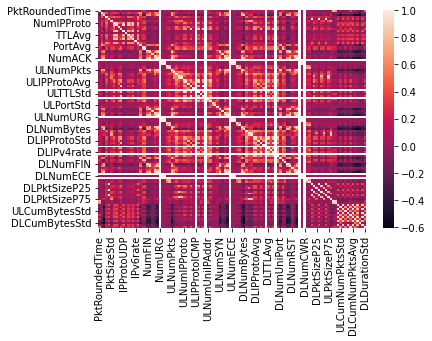

In [110]:
# Heatmap for correlated Dataset-1
sns.heatmap(ndf_1.corr())

<AxesSubplot:>

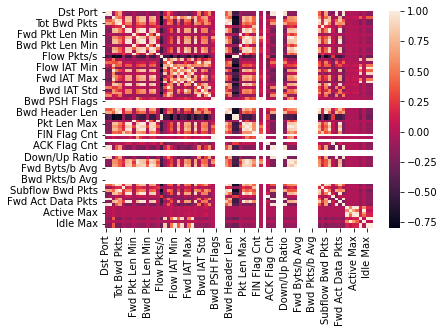

In [111]:
# Heatmap for correlated Dataset-2
sns.heatmap(ndf_2.corr())

<AxesSubplot:>

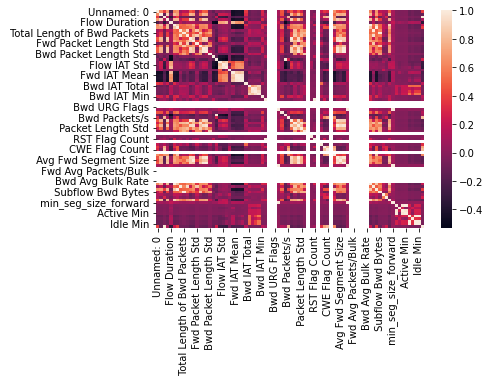

In [112]:
# Heatmap for correlated Dataset-3
sns.heatmap(ndf_3.corr())

In [113]:
# Feature extraction for Dataset-1

data_1 = pd.DataFrame.to_numpy(ndf_1)
data_2 = pd.DataFrame.to_numpy(ndf_2)
data_3 = pd.DataFrame.to_numpy(ndf_3)

from data_gen import feat_extract

feat_1 = feat_extract(data_1)
feat_2 = feat_extract(data_2)
feat_3 = feat_extract(data_3)
feat = [feat_1, feat_2, feat_3]

E:\Jupyter Notebook\Hareesh\Hareesh\Code\data_gen.py:21: RuntimeWarning: invalid value encountered in true_divide
  feat = feat / np.max(feat, axis=0)


In [114]:
# Datasei 1
Label_1=Label_1.replace('BENIGN',0)
Label_1=Label_1.replace('DDoS LOIT', 1)
# Dataset 2
Label_2=Label_2.replace('Benign',0)
Label_2=Label_2.replace('FTP-BruteForce', 1)
# Dataset 3
Label_3=Label_3.replace('BENIGN',0)
Label_3=Label_3.replace('TFTP', 1)

label = [Label_1, Label_2, Label_3]

In [126]:
feat_sel_best_pos, train_data, test_data, train_lab, test_lab=[],[],[],[],[]
for i in range(3):

    X_train, X_test, y_train, y_test = train_test_split(feat[i], label[i], test_size=0.3)
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)

    save('feat_sel_X_train', X_train)
    save('feat_sel_X_test', X_test)
    save('cur_y_train', y_train)
    save('cur_y_test', y_test)


    # feature Selection using Qpso
    lb=(np.zeros([1, X_train.shape[1]]).astype('int16')).tolist()[0]
    ub=(np.ones([1, X_train.shape[1]]).astype('int16')).tolist()[0]
   
    
    problem_dict1 = {"fit_func": obj_fun1,
    "lb": lb,
    "ub": ub,
    "minmax": "min"}
    epoch = 100
    pop_size = 10
    model = BasePSO(problem_dict1, epoch, pop_size)
    best_position, best_fitness = model.solve()
    feat_sel_best_pos.append(best_position)


    ## Feature selection data
    best_position = np.round(best_position)
    X_train = X_train[:, np.where(best_position == 1)[0]]
    X_test = X_test[:, np.where(best_position == 1)[0]]
 

    train_data.append(X_train)
    test_data.append(X_test)
    train_lab.append(y_train)
    test_lab.append(y_test)
    
    print(best_position)
    

save('X_train', train_data)
save('X_test', test_data)
save('y_train', train_lab)
save('y_test', test_lab)
save('feat_sel_best_pos', feat_sel_best_pos)

(1400, 114)
(600, 114)
(1400, 1)
(600, 1)


2022/09/24 11:21:48 AM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 11:21:48 AM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 11:21:48 AM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 11:21:48 AM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 11:21:48 AM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 11:21:48 AM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 11:21:48 AM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 11:21:48 AM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 11:21:48 AM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 11:21:48 AM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 11:21:48 AM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24

2022/09/24 11:23:59 AM, INFO, PSO.BasePSO: >Epoch: 4, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 27.16034 seconds
2022/09/24 11:23:59 AM, INFO, PSO.BasePSO: >Epoch: 4, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 27.16034 seconds
2022/09/24 11:23:59 AM, INFO, PSO.BasePSO: >Epoch: 4, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 27.16034 seconds
2022/09/24 11:23:59 AM, INFO, PSO.BasePSO: >Epoch: 4, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 27.16034 seconds
2022/09/24 11:23:59 AM, INFO, PSO.BasePSO: >Epoch: 4, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 27.16034 seconds
2022/09/24 11:23:59 AM, INFO, PSO.BasePSO: >Epoch: 4, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 27.16034 seconds
2022/09/24 11:23:59 AM, INFO, PSO.BasePSO: >Epoch: 4, Current best: 1.1159053712245202, Global best: 1.115905371224520

2022/09/24 11:25:24 AM, INFO, PSO.BasePSO: >Epoch: 7, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 27.85900 seconds
2022/09/24 11:25:24 AM, INFO, PSO.BasePSO: >Epoch: 7, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 27.85900 seconds
2022/09/24 11:25:52 AM, INFO, PSO.BasePSO: >Epoch: 8, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 28.26158 seconds
2022/09/24 11:25:52 AM, INFO, PSO.BasePSO: >Epoch: 8, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 28.26158 seconds
2022/09/24 11:25:52 AM, INFO, PSO.BasePSO: >Epoch: 8, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 28.26158 seconds
2022/09/24 11:25:52 AM, INFO, PSO.BasePSO: >Epoch: 8, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 28.26158 seconds
2022/09/24 11:25:52 AM, INFO, PSO.BasePSO: >Epoch: 8, Current best: 1.1159053712245202, Global best: 1.115905371224520

2022/09/24 11:27:17 AM, INFO, PSO.BasePSO: >Epoch: 11, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 27.95548 seconds
2022/09/24 11:27:17 AM, INFO, PSO.BasePSO: >Epoch: 11, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 27.95548 seconds
2022/09/24 11:27:17 AM, INFO, PSO.BasePSO: >Epoch: 11, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 27.95548 seconds
2022/09/24 11:27:17 AM, INFO, PSO.BasePSO: >Epoch: 11, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 27.95548 seconds
2022/09/24 11:27:17 AM, INFO, PSO.BasePSO: >Epoch: 11, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 27.95548 seconds
2022/09/24 11:27:17 AM, INFO, PSO.BasePSO: >Epoch: 11, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 27.95548 seconds
2022/09/24 11:27:46 AM, INFO, PSO.BasePSO: >Epoch: 12, Current best: 1.1159053712245202, Global best: 1.11590537

2022/09/24 11:29:15 AM, INFO, PSO.BasePSO: >Epoch: 15, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 28.12360 seconds
2022/09/24 11:29:15 AM, INFO, PSO.BasePSO: >Epoch: 15, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 28.12360 seconds
2022/09/24 11:29:15 AM, INFO, PSO.BasePSO: >Epoch: 15, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 28.12360 seconds
2022/09/24 11:29:15 AM, INFO, PSO.BasePSO: >Epoch: 15, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 28.12360 seconds
2022/09/24 11:29:15 AM, INFO, PSO.BasePSO: >Epoch: 15, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 28.12360 seconds
2022/09/24 11:29:15 AM, INFO, PSO.BasePSO: >Epoch: 15, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 28.12360 seconds
2022/09/24 11:29:15 AM, INFO, PSO.BasePSO: >Epoch: 15, Current best: 1.1159053712245202, Global best: 1.11590537

2022/09/24 11:31:12 AM, INFO, PSO.BasePSO: >Epoch: 19, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 29.19744 seconds
2022/09/24 11:31:12 AM, INFO, PSO.BasePSO: >Epoch: 19, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 29.19744 seconds
2022/09/24 11:31:12 AM, INFO, PSO.BasePSO: >Epoch: 19, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 29.19744 seconds
2022/09/24 11:31:12 AM, INFO, PSO.BasePSO: >Epoch: 19, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 29.19744 seconds
2022/09/24 11:31:12 AM, INFO, PSO.BasePSO: >Epoch: 19, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 29.19744 seconds
2022/09/24 11:31:12 AM, INFO, PSO.BasePSO: >Epoch: 19, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 29.19744 seconds
2022/09/24 11:31:12 AM, INFO, PSO.BasePSO: >Epoch: 19, Current best: 1.1159053712245202, Global best: 1.11590537

2022/09/24 11:32:39 AM, INFO, PSO.BasePSO: >Epoch: 22, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 28.53248 seconds
2022/09/24 11:32:39 AM, INFO, PSO.BasePSO: >Epoch: 22, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 28.53248 seconds
2022/09/24 11:32:39 AM, INFO, PSO.BasePSO: >Epoch: 22, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 28.53248 seconds
2022/09/24 11:33:08 AM, INFO, PSO.BasePSO: >Epoch: 23, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 28.65961 seconds
2022/09/24 11:33:08 AM, INFO, PSO.BasePSO: >Epoch: 23, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 28.65961 seconds
2022/09/24 11:33:08 AM, INFO, PSO.BasePSO: >Epoch: 23, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 28.65961 seconds
2022/09/24 11:33:08 AM, INFO, PSO.BasePSO: >Epoch: 23, Current best: 1.1159053712245202, Global best: 1.11590537

2022/09/24 11:34:29 AM, INFO, PSO.BasePSO: >Epoch: 26, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.73092 seconds
2022/09/24 11:34:29 AM, INFO, PSO.BasePSO: >Epoch: 26, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.73092 seconds
2022/09/24 11:34:29 AM, INFO, PSO.BasePSO: >Epoch: 26, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.73092 seconds
2022/09/24 11:34:29 AM, INFO, PSO.BasePSO: >Epoch: 26, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.73092 seconds
2022/09/24 11:34:29 AM, INFO, PSO.BasePSO: >Epoch: 26, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.73092 seconds
2022/09/24 11:34:29 AM, INFO, PSO.BasePSO: >Epoch: 26, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.73092 seconds
2022/09/24 11:34:29 AM, INFO, PSO.BasePSO: >Epoch: 26, Current best: 1.1159053712245202, Global best: 1.11590537

2022/09/24 11:36:18 AM, INFO, PSO.BasePSO: >Epoch: 30, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.44548 seconds
2022/09/24 11:36:18 AM, INFO, PSO.BasePSO: >Epoch: 30, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.44548 seconds
2022/09/24 11:36:18 AM, INFO, PSO.BasePSO: >Epoch: 30, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.44548 seconds
2022/09/24 11:36:18 AM, INFO, PSO.BasePSO: >Epoch: 30, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.44548 seconds
2022/09/24 11:36:18 AM, INFO, PSO.BasePSO: >Epoch: 30, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.44548 seconds
2022/09/24 11:36:18 AM, INFO, PSO.BasePSO: >Epoch: 30, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.44548 seconds
2022/09/24 11:36:18 AM, INFO, PSO.BasePSO: >Epoch: 30, Current best: 1.1159053712245202, Global best: 1.11590537

2022/09/24 11:38:05 AM, INFO, PSO.BasePSO: >Epoch: 34, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.92466 seconds
2022/09/24 11:38:05 AM, INFO, PSO.BasePSO: >Epoch: 34, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.92466 seconds
2022/09/24 11:38:05 AM, INFO, PSO.BasePSO: >Epoch: 34, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.92466 seconds
2022/09/24 11:38:05 AM, INFO, PSO.BasePSO: >Epoch: 34, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.92466 seconds
2022/09/24 11:38:05 AM, INFO, PSO.BasePSO: >Epoch: 34, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.92466 seconds
2022/09/24 11:38:05 AM, INFO, PSO.BasePSO: >Epoch: 34, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.92466 seconds
2022/09/24 11:38:05 AM, INFO, PSO.BasePSO: >Epoch: 34, Current best: 1.1159053712245202, Global best: 1.11590537

2022/09/24 11:39:24 AM, INFO, PSO.BasePSO: >Epoch: 37, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 25.81682 seconds
2022/09/24 11:39:24 AM, INFO, PSO.BasePSO: >Epoch: 37, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 25.81682 seconds
2022/09/24 11:39:24 AM, INFO, PSO.BasePSO: >Epoch: 37, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 25.81682 seconds
2022/09/24 11:39:24 AM, INFO, PSO.BasePSO: >Epoch: 37, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 25.81682 seconds
2022/09/24 11:39:51 AM, INFO, PSO.BasePSO: >Epoch: 38, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.57307 seconds
2022/09/24 11:39:51 AM, INFO, PSO.BasePSO: >Epoch: 38, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 26.57307 seconds
2022/09/24 11:39:51 AM, INFO, PSO.BasePSO: >Epoch: 38, Current best: 1.1159053712245202, Global best: 1.11590537

2022/09/24 11:41:04 AM, INFO, PSO.BasePSO: >Epoch: 41, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 23.92760 seconds
2022/09/24 11:41:04 AM, INFO, PSO.BasePSO: >Epoch: 41, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 23.92760 seconds
2022/09/24 11:41:04 AM, INFO, PSO.BasePSO: >Epoch: 41, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 23.92760 seconds
2022/09/24 11:41:04 AM, INFO, PSO.BasePSO: >Epoch: 41, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 23.92760 seconds
2022/09/24 11:41:04 AM, INFO, PSO.BasePSO: >Epoch: 41, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 23.92760 seconds
2022/09/24 11:41:04 AM, INFO, PSO.BasePSO: >Epoch: 41, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 23.92760 seconds
2022/09/24 11:41:04 AM, INFO, PSO.BasePSO: >Epoch: 41, Current best: 1.1159053712245202, Global best: 1.11590537

2022/09/24 11:42:42 AM, INFO, PSO.BasePSO: >Epoch: 45, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 23.85595 seconds
2022/09/24 11:42:42 AM, INFO, PSO.BasePSO: >Epoch: 45, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 23.85595 seconds
2022/09/24 11:42:42 AM, INFO, PSO.BasePSO: >Epoch: 45, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 23.85595 seconds
2022/09/24 11:42:42 AM, INFO, PSO.BasePSO: >Epoch: 45, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 23.85595 seconds
2022/09/24 11:42:42 AM, INFO, PSO.BasePSO: >Epoch: 45, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 23.85595 seconds
2022/09/24 11:42:42 AM, INFO, PSO.BasePSO: >Epoch: 45, Current best: 1.1159053712245202, Global best: 1.1159053712245202, Runtime: 23.85595 seconds
2022/09/24 11:42:42 AM, INFO, PSO.BasePSO: >Epoch: 45, Current best: 1.1159053712245202, Global best: 1.11590537

2022/09/24 11:43:56 AM, INFO, PSO.BasePSO: >Epoch: 48, Current best: 1.1139578923916678, Global best: 1.1139578923916678, Runtime: 24.87252 seconds
2022/09/24 11:44:21 AM, INFO, PSO.BasePSO: >Epoch: 49, Current best: 1.1139578923916678, Global best: 1.1139578923916678, Runtime: 25.17290 seconds
2022/09/24 11:44:21 AM, INFO, PSO.BasePSO: >Epoch: 49, Current best: 1.1139578923916678, Global best: 1.1139578923916678, Runtime: 25.17290 seconds
2022/09/24 11:44:21 AM, INFO, PSO.BasePSO: >Epoch: 49, Current best: 1.1139578923916678, Global best: 1.1139578923916678, Runtime: 25.17290 seconds
2022/09/24 11:44:21 AM, INFO, PSO.BasePSO: >Epoch: 49, Current best: 1.1139578923916678, Global best: 1.1139578923916678, Runtime: 25.17290 seconds
2022/09/24 11:44:21 AM, INFO, PSO.BasePSO: >Epoch: 49, Current best: 1.1139578923916678, Global best: 1.1139578923916678, Runtime: 25.17290 seconds
2022/09/24 11:44:21 AM, INFO, PSO.BasePSO: >Epoch: 49, Current best: 1.1139578923916678, Global best: 1.11395789

2022/09/24 11:45:35 AM, INFO, PSO.BasePSO: >Epoch: 52, Current best: 1.1081560283687946, Global best: 1.1081560283687946, Runtime: 25.17652 seconds
2022/09/24 11:45:35 AM, INFO, PSO.BasePSO: >Epoch: 52, Current best: 1.1081560283687946, Global best: 1.1081560283687946, Runtime: 25.17652 seconds
2022/09/24 11:45:35 AM, INFO, PSO.BasePSO: >Epoch: 52, Current best: 1.1081560283687946, Global best: 1.1081560283687946, Runtime: 25.17652 seconds
2022/09/24 11:45:35 AM, INFO, PSO.BasePSO: >Epoch: 52, Current best: 1.1081560283687946, Global best: 1.1081560283687946, Runtime: 25.17652 seconds
2022/09/24 11:45:35 AM, INFO, PSO.BasePSO: >Epoch: 52, Current best: 1.1081560283687946, Global best: 1.1081560283687946, Runtime: 25.17652 seconds
2022/09/24 11:46:01 AM, INFO, PSO.BasePSO: >Epoch: 53, Current best: 1.1081560283687946, Global best: 1.1081560283687946, Runtime: 25.48554 seconds
2022/09/24 11:46:01 AM, INFO, PSO.BasePSO: >Epoch: 53, Current best: 1.1081560283687946, Global best: 1.10815602

2022/09/24 11:47:17 AM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.75066 seconds
2022/09/24 11:47:17 AM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.75066 seconds
2022/09/24 11:47:17 AM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.75066 seconds
2022/09/24 11:47:17 AM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.75066 seconds
2022/09/24 11:47:17 AM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.75066 seconds
2022/09/24 11:47:17 AM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.75066 seconds
2022/09/24 11:47:17 AM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.1005135730007338, Global best: 1.10051357

2022/09/24 11:49:02 AM, INFO, PSO.BasePSO: >Epoch: 60, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.34819 seconds
2022/09/24 11:49:02 AM, INFO, PSO.BasePSO: >Epoch: 60, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.34819 seconds
2022/09/24 11:49:02 AM, INFO, PSO.BasePSO: >Epoch: 60, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.34819 seconds
2022/09/24 11:49:02 AM, INFO, PSO.BasePSO: >Epoch: 60, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.34819 seconds
2022/09/24 11:49:02 AM, INFO, PSO.BasePSO: >Epoch: 60, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.34819 seconds
2022/09/24 11:49:02 AM, INFO, PSO.BasePSO: >Epoch: 60, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.34819 seconds
2022/09/24 11:49:02 AM, INFO, PSO.BasePSO: >Epoch: 60, Current best: 1.1005135730007338, Global best: 1.10051357

2022/09/24 11:50:21 AM, INFO, PSO.BasePSO: >Epoch: 63, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 25.64620 seconds
2022/09/24 11:50:21 AM, INFO, PSO.BasePSO: >Epoch: 63, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 25.64620 seconds
2022/09/24 11:50:47 AM, INFO, PSO.BasePSO: >Epoch: 64, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.48402 seconds
2022/09/24 11:50:47 AM, INFO, PSO.BasePSO: >Epoch: 64, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.48402 seconds
2022/09/24 11:50:47 AM, INFO, PSO.BasePSO: >Epoch: 64, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.48402 seconds
2022/09/24 11:50:47 AM, INFO, PSO.BasePSO: >Epoch: 64, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.48402 seconds
2022/09/24 11:50:47 AM, INFO, PSO.BasePSO: >Epoch: 64, Current best: 1.1005135730007338, Global best: 1.10051357

2022/09/24 11:52:10 AM, INFO, PSO.BasePSO: >Epoch: 67, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 27.81709 seconds
2022/09/24 11:52:10 AM, INFO, PSO.BasePSO: >Epoch: 67, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 27.81709 seconds
2022/09/24 11:52:10 AM, INFO, PSO.BasePSO: >Epoch: 67, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 27.81709 seconds
2022/09/24 11:52:10 AM, INFO, PSO.BasePSO: >Epoch: 67, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 27.81709 seconds
2022/09/24 11:52:10 AM, INFO, PSO.BasePSO: >Epoch: 67, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 27.81709 seconds
2022/09/24 11:52:10 AM, INFO, PSO.BasePSO: >Epoch: 67, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 27.81709 seconds
2022/09/24 11:52:36 AM, INFO, PSO.BasePSO: >Epoch: 68, Current best: 1.1005135730007338, Global best: 1.10051357

2022/09/24 11:53:55 AM, INFO, PSO.BasePSO: >Epoch: 71, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.65933 seconds
2022/09/24 11:53:55 AM, INFO, PSO.BasePSO: >Epoch: 71, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.65933 seconds
2022/09/24 11:53:55 AM, INFO, PSO.BasePSO: >Epoch: 71, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.65933 seconds
2022/09/24 11:53:55 AM, INFO, PSO.BasePSO: >Epoch: 71, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.65933 seconds
2022/09/24 11:53:55 AM, INFO, PSO.BasePSO: >Epoch: 71, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.65933 seconds
2022/09/24 11:53:55 AM, INFO, PSO.BasePSO: >Epoch: 71, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.65933 seconds
2022/09/24 11:53:55 AM, INFO, PSO.BasePSO: >Epoch: 71, Current best: 1.1005135730007338, Global best: 1.10051357

2022/09/24 11:55:41 AM, INFO, PSO.BasePSO: >Epoch: 75, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.23023 seconds
2022/09/24 11:55:41 AM, INFO, PSO.BasePSO: >Epoch: 75, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.23023 seconds
2022/09/24 11:55:41 AM, INFO, PSO.BasePSO: >Epoch: 75, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.23023 seconds
2022/09/24 11:55:41 AM, INFO, PSO.BasePSO: >Epoch: 75, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.23023 seconds
2022/09/24 11:55:41 AM, INFO, PSO.BasePSO: >Epoch: 75, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.23023 seconds
2022/09/24 11:55:41 AM, INFO, PSO.BasePSO: >Epoch: 75, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.23023 seconds
2022/09/24 11:55:41 AM, INFO, PSO.BasePSO: >Epoch: 75, Current best: 1.1005135730007338, Global best: 1.10051357

2022/09/24 11:57:01 AM, INFO, PSO.BasePSO: >Epoch: 78, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.45787 seconds
2022/09/24 11:57:01 AM, INFO, PSO.BasePSO: >Epoch: 78, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.45787 seconds
2022/09/24 11:57:01 AM, INFO, PSO.BasePSO: >Epoch: 78, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.45787 seconds
2022/09/24 11:57:31 AM, INFO, PSO.BasePSO: >Epoch: 79, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 29.24908 seconds
2022/09/24 11:57:31 AM, INFO, PSO.BasePSO: >Epoch: 79, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 29.24908 seconds
2022/09/24 11:57:31 AM, INFO, PSO.BasePSO: >Epoch: 79, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 29.24908 seconds
2022/09/24 11:57:31 AM, INFO, PSO.BasePSO: >Epoch: 79, Current best: 1.1005135730007338, Global best: 1.10051357

2022/09/24 11:58:50 AM, INFO, PSO.BasePSO: >Epoch: 82, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.35152 seconds
2022/09/24 11:58:50 AM, INFO, PSO.BasePSO: >Epoch: 82, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.35152 seconds
2022/09/24 11:58:50 AM, INFO, PSO.BasePSO: >Epoch: 82, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.35152 seconds
2022/09/24 11:58:50 AM, INFO, PSO.BasePSO: >Epoch: 82, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.35152 seconds
2022/09/24 11:58:50 AM, INFO, PSO.BasePSO: >Epoch: 82, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.35152 seconds
2022/09/24 11:58:50 AM, INFO, PSO.BasePSO: >Epoch: 82, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.35152 seconds
2022/09/24 11:58:50 AM, INFO, PSO.BasePSO: >Epoch: 82, Current best: 1.1005135730007338, Global best: 1.10051357

2022/09/24 12:00:37 PM, INFO, PSO.BasePSO: >Epoch: 86, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 27.75991 seconds
2022/09/24 12:00:37 PM, INFO, PSO.BasePSO: >Epoch: 86, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 27.75991 seconds
2022/09/24 12:00:37 PM, INFO, PSO.BasePSO: >Epoch: 86, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 27.75991 seconds
2022/09/24 12:00:37 PM, INFO, PSO.BasePSO: >Epoch: 86, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 27.75991 seconds
2022/09/24 12:00:37 PM, INFO, PSO.BasePSO: >Epoch: 86, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 27.75991 seconds
2022/09/24 12:00:37 PM, INFO, PSO.BasePSO: >Epoch: 86, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 27.75991 seconds
2022/09/24 12:00:37 PM, INFO, PSO.BasePSO: >Epoch: 86, Current best: 1.1005135730007338, Global best: 1.10051357

2022/09/24 12:02:27 PM, INFO, PSO.BasePSO: >Epoch: 90, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.37353 seconds
2022/09/24 12:02:27 PM, INFO, PSO.BasePSO: >Epoch: 90, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.37353 seconds
2022/09/24 12:02:27 PM, INFO, PSO.BasePSO: >Epoch: 90, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.37353 seconds
2022/09/24 12:02:27 PM, INFO, PSO.BasePSO: >Epoch: 90, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.37353 seconds
2022/09/24 12:02:27 PM, INFO, PSO.BasePSO: >Epoch: 90, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.37353 seconds
2022/09/24 12:02:27 PM, INFO, PSO.BasePSO: >Epoch: 90, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.37353 seconds
2022/09/24 12:02:27 PM, INFO, PSO.BasePSO: >Epoch: 90, Current best: 1.1005135730007338, Global best: 1.10051357

2022/09/24 12:03:47 PM, INFO, PSO.BasePSO: >Epoch: 93, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 27.09227 seconds
2022/09/24 12:03:47 PM, INFO, PSO.BasePSO: >Epoch: 93, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 27.09227 seconds
2022/09/24 12:03:47 PM, INFO, PSO.BasePSO: >Epoch: 93, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 27.09227 seconds
2022/09/24 12:03:47 PM, INFO, PSO.BasePSO: >Epoch: 93, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 27.09227 seconds
2022/09/24 12:04:14 PM, INFO, PSO.BasePSO: >Epoch: 94, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 27.56917 seconds
2022/09/24 12:04:14 PM, INFO, PSO.BasePSO: >Epoch: 94, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 27.56917 seconds
2022/09/24 12:04:14 PM, INFO, PSO.BasePSO: >Epoch: 94, Current best: 1.1005135730007338, Global best: 1.10051357

2022/09/24 12:05:38 PM, INFO, PSO.BasePSO: >Epoch: 97, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.84392 seconds
2022/09/24 12:05:38 PM, INFO, PSO.BasePSO: >Epoch: 97, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.84392 seconds
2022/09/24 12:05:38 PM, INFO, PSO.BasePSO: >Epoch: 97, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.84392 seconds
2022/09/24 12:05:38 PM, INFO, PSO.BasePSO: >Epoch: 97, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.84392 seconds
2022/09/24 12:05:38 PM, INFO, PSO.BasePSO: >Epoch: 97, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.84392 seconds
2022/09/24 12:05:38 PM, INFO, PSO.BasePSO: >Epoch: 97, Current best: 1.1005135730007338, Global best: 1.1005135730007338, Runtime: 26.84392 seconds
2022/09/24 12:05:38 PM, INFO, PSO.BasePSO: >Epoch: 97, Current best: 1.1005135730007338, Global best: 1.10051357

[1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
(1400, 81)
(600, 81)
(1400, 1)
(600, 1)


2022/09/24 12:07:00 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:07:00 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:07:00 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:07:00 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:07:00 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:07:00 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:07:00 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:07:00 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:07:00 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:07:00 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:07:00 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24

2022/09/24 12:08:18 PM, INFO, PSO.BasePSO: >Epoch: 3, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 19.19140 seconds
2022/09/24 12:08:18 PM, INFO, PSO.BasePSO: >Epoch: 3, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 19.19140 seconds
2022/09/24 12:08:39 PM, INFO, PSO.BasePSO: >Epoch: 4, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 20.15383 seconds
2022/09/24 12:08:39 PM, INFO, PSO.BasePSO: >Epoch: 4, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 20.15383 seconds
2022/09/24 12:08:39 PM, INFO, PSO.BasePSO: >Epoch: 4, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 20.15383 seconds
2022/09/24 12:08:39 PM, INFO, PSO.BasePSO: >Epoch: 4, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 20.15383 seconds
2022/09/24 12:08:39 PM, INFO, PSO.BasePSO: >Epoch: 4, Current best: 1.0656057968955353, Global best: 1.065605796895535

2022/09/24 12:09:39 PM, INFO, PSO.BasePSO: >Epoch: 7, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 19.50316 seconds
2022/09/24 12:09:39 PM, INFO, PSO.BasePSO: >Epoch: 7, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 19.50316 seconds
2022/09/24 12:09:39 PM, INFO, PSO.BasePSO: >Epoch: 7, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 19.50316 seconds
2022/09/24 12:09:39 PM, INFO, PSO.BasePSO: >Epoch: 7, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 19.50316 seconds
2022/09/24 12:09:39 PM, INFO, PSO.BasePSO: >Epoch: 7, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 19.50316 seconds
2022/09/24 12:09:39 PM, INFO, PSO.BasePSO: >Epoch: 7, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 19.50316 seconds
2022/09/24 12:09:39 PM, INFO, PSO.BasePSO: >Epoch: 7, Current best: 1.0656057968955353, Global best: 1.065605796895535

2022/09/24 12:10:39 PM, INFO, PSO.BasePSO: >Epoch: 10, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 20.96000 seconds
2022/09/24 12:10:39 PM, INFO, PSO.BasePSO: >Epoch: 10, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 20.96000 seconds
2022/09/24 12:11:00 PM, INFO, PSO.BasePSO: >Epoch: 11, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 20.99556 seconds
2022/09/24 12:11:00 PM, INFO, PSO.BasePSO: >Epoch: 11, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 20.99556 seconds
2022/09/24 12:11:00 PM, INFO, PSO.BasePSO: >Epoch: 11, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 20.99556 seconds
2022/09/24 12:11:00 PM, INFO, PSO.BasePSO: >Epoch: 11, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 20.99556 seconds
2022/09/24 12:11:00 PM, INFO, PSO.BasePSO: >Epoch: 11, Current best: 1.0656057968955353, Global best: 1.06560579

2022/09/24 12:12:00 PM, INFO, PSO.BasePSO: >Epoch: 14, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 20.24340 seconds
2022/09/24 12:12:00 PM, INFO, PSO.BasePSO: >Epoch: 14, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 20.24340 seconds
2022/09/24 12:12:00 PM, INFO, PSO.BasePSO: >Epoch: 14, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 20.24340 seconds
2022/09/24 12:12:00 PM, INFO, PSO.BasePSO: >Epoch: 14, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 20.24340 seconds
2022/09/24 12:12:00 PM, INFO, PSO.BasePSO: >Epoch: 14, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 20.24340 seconds
2022/09/24 12:12:00 PM, INFO, PSO.BasePSO: >Epoch: 14, Current best: 1.0656057968955353, Global best: 1.0656057968955353, Runtime: 20.24340 seconds
2022/09/24 12:12:00 PM, INFO, PSO.BasePSO: >Epoch: 14, Current best: 1.0656057968955353, Global best: 1.06560579

2022/09/24 12:12:59 PM, INFO, PSO.BasePSO: >Epoch: 17, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 18.85476 seconds
2022/09/24 12:12:59 PM, INFO, PSO.BasePSO: >Epoch: 17, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 18.85476 seconds
2022/09/24 12:13:19 PM, INFO, PSO.BasePSO: >Epoch: 18, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.32275 seconds
2022/09/24 12:13:19 PM, INFO, PSO.BasePSO: >Epoch: 18, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.32275 seconds
2022/09/24 12:13:19 PM, INFO, PSO.BasePSO: >Epoch: 18, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.32275 seconds
2022/09/24 12:13:19 PM, INFO, PSO.BasePSO: >Epoch: 18, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.32275 seconds
2022/09/24 12:13:19 PM, INFO, PSO.BasePSO: >Epoch: 18, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:14:18 PM, INFO, PSO.BasePSO: >Epoch: 21, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.37176 seconds
2022/09/24 12:14:18 PM, INFO, PSO.BasePSO: >Epoch: 21, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.37176 seconds
2022/09/24 12:14:18 PM, INFO, PSO.BasePSO: >Epoch: 21, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.37176 seconds
2022/09/24 12:14:18 PM, INFO, PSO.BasePSO: >Epoch: 21, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.37176 seconds
2022/09/24 12:14:18 PM, INFO, PSO.BasePSO: >Epoch: 21, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.37176 seconds
2022/09/24 12:14:18 PM, INFO, PSO.BasePSO: >Epoch: 21, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.37176 seconds
2022/09/24 12:14:18 PM, INFO, PSO.BasePSO: >Epoch: 21, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:15:16 PM, INFO, PSO.BasePSO: >Epoch: 24, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.48727 seconds
2022/09/24 12:15:16 PM, INFO, PSO.BasePSO: >Epoch: 24, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.48727 seconds
2022/09/24 12:15:36 PM, INFO, PSO.BasePSO: >Epoch: 25, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.66103 seconds
2022/09/24 12:15:36 PM, INFO, PSO.BasePSO: >Epoch: 25, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.66103 seconds
2022/09/24 12:15:36 PM, INFO, PSO.BasePSO: >Epoch: 25, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.66103 seconds
2022/09/24 12:15:36 PM, INFO, PSO.BasePSO: >Epoch: 25, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.66103 seconds
2022/09/24 12:15:36 PM, INFO, PSO.BasePSO: >Epoch: 25, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:16:36 PM, INFO, PSO.BasePSO: >Epoch: 28, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.10387 seconds
2022/09/24 12:16:36 PM, INFO, PSO.BasePSO: >Epoch: 28, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.10387 seconds
2022/09/24 12:16:36 PM, INFO, PSO.BasePSO: >Epoch: 28, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.10387 seconds
2022/09/24 12:16:36 PM, INFO, PSO.BasePSO: >Epoch: 28, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.10387 seconds
2022/09/24 12:16:36 PM, INFO, PSO.BasePSO: >Epoch: 28, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.10387 seconds
2022/09/24 12:16:36 PM, INFO, PSO.BasePSO: >Epoch: 28, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.10387 seconds
2022/09/24 12:16:36 PM, INFO, PSO.BasePSO: >Epoch: 28, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:17:36 PM, INFO, PSO.BasePSO: >Epoch: 31, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.97608 seconds
2022/09/24 12:17:36 PM, INFO, PSO.BasePSO: >Epoch: 31, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.97608 seconds
2022/09/24 12:17:57 PM, INFO, PSO.BasePSO: >Epoch: 32, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 21.07420 seconds
2022/09/24 12:17:57 PM, INFO, PSO.BasePSO: >Epoch: 32, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 21.07420 seconds
2022/09/24 12:17:57 PM, INFO, PSO.BasePSO: >Epoch: 32, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 21.07420 seconds
2022/09/24 12:17:57 PM, INFO, PSO.BasePSO: >Epoch: 32, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 21.07420 seconds
2022/09/24 12:17:57 PM, INFO, PSO.BasePSO: >Epoch: 32, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:18:57 PM, INFO, PSO.BasePSO: >Epoch: 35, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.67690 seconds
2022/09/24 12:18:57 PM, INFO, PSO.BasePSO: >Epoch: 35, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.67690 seconds
2022/09/24 12:18:57 PM, INFO, PSO.BasePSO: >Epoch: 35, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.67690 seconds
2022/09/24 12:18:57 PM, INFO, PSO.BasePSO: >Epoch: 35, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.67690 seconds
2022/09/24 12:18:57 PM, INFO, PSO.BasePSO: >Epoch: 35, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.67690 seconds
2022/09/24 12:18:57 PM, INFO, PSO.BasePSO: >Epoch: 35, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.67690 seconds
2022/09/24 12:18:57 PM, INFO, PSO.BasePSO: >Epoch: 35, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:19:58 PM, INFO, PSO.BasePSO: >Epoch: 38, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.25540 seconds
2022/09/24 12:19:58 PM, INFO, PSO.BasePSO: >Epoch: 38, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.25540 seconds
2022/09/24 12:20:18 PM, INFO, PSO.BasePSO: >Epoch: 39, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.03752 seconds
2022/09/24 12:20:18 PM, INFO, PSO.BasePSO: >Epoch: 39, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.03752 seconds
2022/09/24 12:20:18 PM, INFO, PSO.BasePSO: >Epoch: 39, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.03752 seconds
2022/09/24 12:20:18 PM, INFO, PSO.BasePSO: >Epoch: 39, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.03752 seconds
2022/09/24 12:20:18 PM, INFO, PSO.BasePSO: >Epoch: 39, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:21:17 PM, INFO, PSO.BasePSO: >Epoch: 42, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.17453 seconds
2022/09/24 12:21:17 PM, INFO, PSO.BasePSO: >Epoch: 42, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.17453 seconds
2022/09/24 12:21:17 PM, INFO, PSO.BasePSO: >Epoch: 42, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.17453 seconds
2022/09/24 12:21:17 PM, INFO, PSO.BasePSO: >Epoch: 42, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.17453 seconds
2022/09/24 12:21:17 PM, INFO, PSO.BasePSO: >Epoch: 42, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.17453 seconds
2022/09/24 12:21:17 PM, INFO, PSO.BasePSO: >Epoch: 42, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.17453 seconds
2022/09/24 12:21:17 PM, INFO, PSO.BasePSO: >Epoch: 42, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:22:16 PM, INFO, PSO.BasePSO: >Epoch: 45, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 18.97750 seconds
2022/09/24 12:22:16 PM, INFO, PSO.BasePSO: >Epoch: 45, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 18.97750 seconds
2022/09/24 12:22:36 PM, INFO, PSO.BasePSO: >Epoch: 46, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.17420 seconds
2022/09/24 12:22:36 PM, INFO, PSO.BasePSO: >Epoch: 46, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.17420 seconds
2022/09/24 12:22:36 PM, INFO, PSO.BasePSO: >Epoch: 46, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.17420 seconds
2022/09/24 12:22:36 PM, INFO, PSO.BasePSO: >Epoch: 46, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.17420 seconds
2022/09/24 12:22:36 PM, INFO, PSO.BasePSO: >Epoch: 46, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:23:36 PM, INFO, PSO.BasePSO: >Epoch: 49, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.04561 seconds
2022/09/24 12:23:36 PM, INFO, PSO.BasePSO: >Epoch: 49, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.04561 seconds
2022/09/24 12:23:36 PM, INFO, PSO.BasePSO: >Epoch: 49, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.04561 seconds
2022/09/24 12:23:36 PM, INFO, PSO.BasePSO: >Epoch: 49, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.04561 seconds
2022/09/24 12:23:36 PM, INFO, PSO.BasePSO: >Epoch: 49, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.04561 seconds
2022/09/24 12:23:36 PM, INFO, PSO.BasePSO: >Epoch: 49, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.04561 seconds
2022/09/24 12:23:36 PM, INFO, PSO.BasePSO: >Epoch: 49, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:24:36 PM, INFO, PSO.BasePSO: >Epoch: 52, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.20435 seconds
2022/09/24 12:24:36 PM, INFO, PSO.BasePSO: >Epoch: 52, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.20435 seconds
2022/09/24 12:24:56 PM, INFO, PSO.BasePSO: >Epoch: 53, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.20816 seconds
2022/09/24 12:24:56 PM, INFO, PSO.BasePSO: >Epoch: 53, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.20816 seconds
2022/09/24 12:24:56 PM, INFO, PSO.BasePSO: >Epoch: 53, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.20816 seconds
2022/09/24 12:24:56 PM, INFO, PSO.BasePSO: >Epoch: 53, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.20816 seconds
2022/09/24 12:24:56 PM, INFO, PSO.BasePSO: >Epoch: 53, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:25:55 PM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.02359 seconds
2022/09/24 12:25:55 PM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.02359 seconds
2022/09/24 12:25:55 PM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.02359 seconds
2022/09/24 12:25:55 PM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.02359 seconds
2022/09/24 12:25:55 PM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.02359 seconds
2022/09/24 12:25:55 PM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.02359 seconds
2022/09/24 12:25:55 PM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:26:54 PM, INFO, PSO.BasePSO: >Epoch: 59, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.31296 seconds
2022/09/24 12:26:54 PM, INFO, PSO.BasePSO: >Epoch: 59, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.31296 seconds
2022/09/24 12:27:14 PM, INFO, PSO.BasePSO: >Epoch: 60, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.32774 seconds
2022/09/24 12:27:14 PM, INFO, PSO.BasePSO: >Epoch: 60, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.32774 seconds
2022/09/24 12:27:14 PM, INFO, PSO.BasePSO: >Epoch: 60, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.32774 seconds
2022/09/24 12:27:14 PM, INFO, PSO.BasePSO: >Epoch: 60, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.32774 seconds
2022/09/24 12:27:14 PM, INFO, PSO.BasePSO: >Epoch: 60, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:28:13 PM, INFO, PSO.BasePSO: >Epoch: 63, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.65288 seconds
2022/09/24 12:28:13 PM, INFO, PSO.BasePSO: >Epoch: 63, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.65288 seconds
2022/09/24 12:28:13 PM, INFO, PSO.BasePSO: >Epoch: 63, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.65288 seconds
2022/09/24 12:28:13 PM, INFO, PSO.BasePSO: >Epoch: 63, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.65288 seconds
2022/09/24 12:28:13 PM, INFO, PSO.BasePSO: >Epoch: 63, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.65288 seconds
2022/09/24 12:28:13 PM, INFO, PSO.BasePSO: >Epoch: 63, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.65288 seconds
2022/09/24 12:28:13 PM, INFO, PSO.BasePSO: >Epoch: 63, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:29:13 PM, INFO, PSO.BasePSO: >Epoch: 66, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.32358 seconds
2022/09/24 12:29:13 PM, INFO, PSO.BasePSO: >Epoch: 66, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.32358 seconds
2022/09/24 12:29:33 PM, INFO, PSO.BasePSO: >Epoch: 67, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.92869 seconds
2022/09/24 12:29:33 PM, INFO, PSO.BasePSO: >Epoch: 67, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.92869 seconds
2022/09/24 12:29:33 PM, INFO, PSO.BasePSO: >Epoch: 67, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.92869 seconds
2022/09/24 12:29:33 PM, INFO, PSO.BasePSO: >Epoch: 67, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.92869 seconds
2022/09/24 12:29:33 PM, INFO, PSO.BasePSO: >Epoch: 67, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:30:32 PM, INFO, PSO.BasePSO: >Epoch: 70, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.38537 seconds
2022/09/24 12:30:32 PM, INFO, PSO.BasePSO: >Epoch: 70, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.38537 seconds
2022/09/24 12:30:32 PM, INFO, PSO.BasePSO: >Epoch: 70, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.38537 seconds
2022/09/24 12:30:32 PM, INFO, PSO.BasePSO: >Epoch: 70, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.38537 seconds
2022/09/24 12:30:32 PM, INFO, PSO.BasePSO: >Epoch: 70, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.38537 seconds
2022/09/24 12:30:32 PM, INFO, PSO.BasePSO: >Epoch: 70, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.38537 seconds
2022/09/24 12:30:32 PM, INFO, PSO.BasePSO: >Epoch: 70, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:31:30 PM, INFO, PSO.BasePSO: >Epoch: 73, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.25648 seconds
2022/09/24 12:31:30 PM, INFO, PSO.BasePSO: >Epoch: 73, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.25648 seconds
2022/09/24 12:31:49 PM, INFO, PSO.BasePSO: >Epoch: 74, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.06469 seconds
2022/09/24 12:31:49 PM, INFO, PSO.BasePSO: >Epoch: 74, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.06469 seconds
2022/09/24 12:31:49 PM, INFO, PSO.BasePSO: >Epoch: 74, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.06469 seconds
2022/09/24 12:31:49 PM, INFO, PSO.BasePSO: >Epoch: 74, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.06469 seconds
2022/09/24 12:31:49 PM, INFO, PSO.BasePSO: >Epoch: 74, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:32:49 PM, INFO, PSO.BasePSO: >Epoch: 77, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.93618 seconds
2022/09/24 12:32:49 PM, INFO, PSO.BasePSO: >Epoch: 77, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.93618 seconds
2022/09/24 12:32:49 PM, INFO, PSO.BasePSO: >Epoch: 77, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.93618 seconds
2022/09/24 12:32:49 PM, INFO, PSO.BasePSO: >Epoch: 77, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.93618 seconds
2022/09/24 12:32:49 PM, INFO, PSO.BasePSO: >Epoch: 77, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.93618 seconds
2022/09/24 12:32:49 PM, INFO, PSO.BasePSO: >Epoch: 77, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.93618 seconds
2022/09/24 12:32:49 PM, INFO, PSO.BasePSO: >Epoch: 77, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:33:49 PM, INFO, PSO.BasePSO: >Epoch: 80, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.64004 seconds
2022/09/24 12:33:49 PM, INFO, PSO.BasePSO: >Epoch: 80, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.64004 seconds
2022/09/24 12:34:09 PM, INFO, PSO.BasePSO: >Epoch: 81, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.84347 seconds
2022/09/24 12:34:09 PM, INFO, PSO.BasePSO: >Epoch: 81, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.84347 seconds
2022/09/24 12:34:09 PM, INFO, PSO.BasePSO: >Epoch: 81, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.84347 seconds
2022/09/24 12:34:09 PM, INFO, PSO.BasePSO: >Epoch: 81, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.84347 seconds
2022/09/24 12:34:09 PM, INFO, PSO.BasePSO: >Epoch: 81, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:35:08 PM, INFO, PSO.BasePSO: >Epoch: 84, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.75270 seconds
2022/09/24 12:35:08 PM, INFO, PSO.BasePSO: >Epoch: 84, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.75270 seconds
2022/09/24 12:35:08 PM, INFO, PSO.BasePSO: >Epoch: 84, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.75270 seconds
2022/09/24 12:35:08 PM, INFO, PSO.BasePSO: >Epoch: 84, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.75270 seconds
2022/09/24 12:35:08 PM, INFO, PSO.BasePSO: >Epoch: 84, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.75270 seconds
2022/09/24 12:35:08 PM, INFO, PSO.BasePSO: >Epoch: 84, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.75270 seconds
2022/09/24 12:35:08 PM, INFO, PSO.BasePSO: >Epoch: 84, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:36:08 PM, INFO, PSO.BasePSO: >Epoch: 87, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.27332 seconds
2022/09/24 12:36:08 PM, INFO, PSO.BasePSO: >Epoch: 87, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.27332 seconds
2022/09/24 12:36:28 PM, INFO, PSO.BasePSO: >Epoch: 88, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.46574 seconds
2022/09/24 12:36:28 PM, INFO, PSO.BasePSO: >Epoch: 88, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.46574 seconds
2022/09/24 12:36:28 PM, INFO, PSO.BasePSO: >Epoch: 88, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.46574 seconds
2022/09/24 12:36:28 PM, INFO, PSO.BasePSO: >Epoch: 88, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.46574 seconds
2022/09/24 12:36:28 PM, INFO, PSO.BasePSO: >Epoch: 88, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:37:28 PM, INFO, PSO.BasePSO: >Epoch: 91, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.40030 seconds
2022/09/24 12:37:28 PM, INFO, PSO.BasePSO: >Epoch: 91, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.40030 seconds
2022/09/24 12:37:28 PM, INFO, PSO.BasePSO: >Epoch: 91, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.40030 seconds
2022/09/24 12:37:28 PM, INFO, PSO.BasePSO: >Epoch: 91, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.40030 seconds
2022/09/24 12:37:28 PM, INFO, PSO.BasePSO: >Epoch: 91, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.40030 seconds
2022/09/24 12:37:28 PM, INFO, PSO.BasePSO: >Epoch: 91, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.40030 seconds
2022/09/24 12:37:28 PM, INFO, PSO.BasePSO: >Epoch: 91, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:38:26 PM, INFO, PSO.BasePSO: >Epoch: 94, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.57548 seconds
2022/09/24 12:38:26 PM, INFO, PSO.BasePSO: >Epoch: 94, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.57548 seconds
2022/09/24 12:38:46 PM, INFO, PSO.BasePSO: >Epoch: 95, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.27342 seconds
2022/09/24 12:38:46 PM, INFO, PSO.BasePSO: >Epoch: 95, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.27342 seconds
2022/09/24 12:38:46 PM, INFO, PSO.BasePSO: >Epoch: 95, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.27342 seconds
2022/09/24 12:38:46 PM, INFO, PSO.BasePSO: >Epoch: 95, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 20.27342 seconds
2022/09/24 12:38:46 PM, INFO, PSO.BasePSO: >Epoch: 95, Current best: 1.0638297872340425, Global best: 1.06382978

2022/09/24 12:39:45 PM, INFO, PSO.BasePSO: >Epoch: 98, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.09691 seconds
2022/09/24 12:39:45 PM, INFO, PSO.BasePSO: >Epoch: 98, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.09691 seconds
2022/09/24 12:39:45 PM, INFO, PSO.BasePSO: >Epoch: 98, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.09691 seconds
2022/09/24 12:39:45 PM, INFO, PSO.BasePSO: >Epoch: 98, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.09691 seconds
2022/09/24 12:39:45 PM, INFO, PSO.BasePSO: >Epoch: 98, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.09691 seconds
2022/09/24 12:39:45 PM, INFO, PSO.BasePSO: >Epoch: 98, Current best: 1.0638297872340425, Global best: 1.0638297872340425, Runtime: 19.09691 seconds
2022/09/24 12:39:45 PM, INFO, PSO.BasePSO: >Epoch: 98, Current best: 1.0638297872340425, Global best: 1.06382978

[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 0.]
(408, 85)
(176, 85)
(408, 1)
(176, 1)


2022/09/24 12:40:26 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:40:26 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:40:26 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:40:26 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:40:26 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:40:26 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:40:26 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:40:26 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:40:26 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:40:26 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24 12:40:26 PM, INFO, PSO.BasePSO: Solving single objective optimization problem.
2022/09/24

2022/09/24 12:41:00 PM, INFO, PSO.BasePSO: >Epoch: 3, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 9.01196 seconds
2022/09/24 12:41:00 PM, INFO, PSO.BasePSO: >Epoch: 3, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 9.01196 seconds
2022/09/24 12:41:00 PM, INFO, PSO.BasePSO: >Epoch: 3, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 9.01196 seconds
2022/09/24 12:41:00 PM, INFO, PSO.BasePSO: >Epoch: 3, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 9.01196 seconds
2022/09/24 12:41:00 PM, INFO, PSO.BasePSO: >Epoch: 3, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 9.01196 seconds
2022/09/24 12:41:08 PM, INFO, PSO.BasePSO: >Epoch: 4, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.77925 seconds
2022/09/24 12:41:08 PM, INFO, PSO.BasePSO: >Epoch: 4, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Run

2022/09/24 12:41:32 PM, INFO, PSO.BasePSO: >Epoch: 7, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 8.06273 seconds
2022/09/24 12:41:32 PM, INFO, PSO.BasePSO: >Epoch: 7, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 8.06273 seconds
2022/09/24 12:41:32 PM, INFO, PSO.BasePSO: >Epoch: 7, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 8.06273 seconds
2022/09/24 12:41:32 PM, INFO, PSO.BasePSO: >Epoch: 7, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 8.06273 seconds
2022/09/24 12:41:32 PM, INFO, PSO.BasePSO: >Epoch: 7, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 8.06273 seconds
2022/09/24 12:41:32 PM, INFO, PSO.BasePSO: >Epoch: 7, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 8.06273 seconds
2022/09/24 12:41:32 PM, INFO, PSO.BasePSO: >Epoch: 7, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Run

2022/09/24 12:41:54 PM, INFO, PSO.BasePSO: >Epoch: 10, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 6.98965 seconds
2022/09/24 12:41:54 PM, INFO, PSO.BasePSO: >Epoch: 10, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 6.98965 seconds
2022/09/24 12:41:54 PM, INFO, PSO.BasePSO: >Epoch: 10, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 6.98965 seconds
2022/09/24 12:41:54 PM, INFO, PSO.BasePSO: >Epoch: 10, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 6.98965 seconds
2022/09/24 12:41:54 PM, INFO, PSO.BasePSO: >Epoch: 10, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 6.98965 seconds
2022/09/24 12:41:54 PM, INFO, PSO.BasePSO: >Epoch: 10, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 6.98965 seconds
2022/09/24 12:41:54 PM, INFO, PSO.BasePSO: >Epoch: 10, Current best: 1.1486751076882915, Global best: 1.14867510768829

2022/09/24 12:42:16 PM, INFO, PSO.BasePSO: >Epoch: 13, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.02487 seconds
2022/09/24 12:42:16 PM, INFO, PSO.BasePSO: >Epoch: 13, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.02487 seconds
2022/09/24 12:42:16 PM, INFO, PSO.BasePSO: >Epoch: 13, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.02487 seconds
2022/09/24 12:42:16 PM, INFO, PSO.BasePSO: >Epoch: 13, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.02487 seconds
2022/09/24 12:42:16 PM, INFO, PSO.BasePSO: >Epoch: 13, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.02487 seconds
2022/09/24 12:42:23 PM, INFO, PSO.BasePSO: >Epoch: 14, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.52173 seconds
2022/09/24 12:42:23 PM, INFO, PSO.BasePSO: >Epoch: 14, Current best: 1.1486751076882915, Global best: 1.14867510768829

2022/09/24 12:42:45 PM, INFO, PSO.BasePSO: >Epoch: 17, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 6.92531 seconds
2022/09/24 12:42:45 PM, INFO, PSO.BasePSO: >Epoch: 17, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 6.92531 seconds
2022/09/24 12:42:45 PM, INFO, PSO.BasePSO: >Epoch: 17, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 6.92531 seconds
2022/09/24 12:42:45 PM, INFO, PSO.BasePSO: >Epoch: 17, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 6.92531 seconds
2022/09/24 12:42:45 PM, INFO, PSO.BasePSO: >Epoch: 17, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 6.92531 seconds
2022/09/24 12:42:45 PM, INFO, PSO.BasePSO: >Epoch: 17, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 6.92531 seconds
2022/09/24 12:42:45 PM, INFO, PSO.BasePSO: >Epoch: 17, Current best: 1.1486751076882915, Global best: 1.14867510768829

2022/09/24 12:43:06 PM, INFO, PSO.BasePSO: >Epoch: 20, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.20265 seconds
2022/09/24 12:43:06 PM, INFO, PSO.BasePSO: >Epoch: 20, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.20265 seconds
2022/09/24 12:43:06 PM, INFO, PSO.BasePSO: >Epoch: 20, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.20265 seconds
2022/09/24 12:43:06 PM, INFO, PSO.BasePSO: >Epoch: 20, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.20265 seconds
2022/09/24 12:43:06 PM, INFO, PSO.BasePSO: >Epoch: 20, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.20265 seconds
2022/09/24 12:43:06 PM, INFO, PSO.BasePSO: >Epoch: 20, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.20265 seconds
2022/09/24 12:43:06 PM, INFO, PSO.BasePSO: >Epoch: 20, Current best: 1.1486751076882915, Global best: 1.14867510768829

2022/09/24 12:43:28 PM, INFO, PSO.BasePSO: >Epoch: 23, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.44869 seconds
2022/09/24 12:43:28 PM, INFO, PSO.BasePSO: >Epoch: 23, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.44869 seconds
2022/09/24 12:43:28 PM, INFO, PSO.BasePSO: >Epoch: 23, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.44869 seconds
2022/09/24 12:43:28 PM, INFO, PSO.BasePSO: >Epoch: 23, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.44869 seconds
2022/09/24 12:43:28 PM, INFO, PSO.BasePSO: >Epoch: 23, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.44869 seconds
2022/09/24 12:43:28 PM, INFO, PSO.BasePSO: >Epoch: 23, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.44869 seconds
2022/09/24 12:43:28 PM, INFO, PSO.BasePSO: >Epoch: 23, Current best: 1.1486751076882915, Global best: 1.14867510768829

2022/09/24 12:43:49 PM, INFO, PSO.BasePSO: >Epoch: 26, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.02531 seconds
2022/09/24 12:43:49 PM, INFO, PSO.BasePSO: >Epoch: 26, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.02531 seconds
2022/09/24 12:43:56 PM, INFO, PSO.BasePSO: >Epoch: 27, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.27907 seconds
2022/09/24 12:43:56 PM, INFO, PSO.BasePSO: >Epoch: 27, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.27907 seconds
2022/09/24 12:43:56 PM, INFO, PSO.BasePSO: >Epoch: 27, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.27907 seconds
2022/09/24 12:43:56 PM, INFO, PSO.BasePSO: >Epoch: 27, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.27907 seconds
2022/09/24 12:43:56 PM, INFO, PSO.BasePSO: >Epoch: 27, Current best: 1.1486751076882915, Global best: 1.14867510768829

2022/09/24 12:44:17 PM, INFO, PSO.BasePSO: >Epoch: 30, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.39778 seconds
2022/09/24 12:44:17 PM, INFO, PSO.BasePSO: >Epoch: 30, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.39778 seconds
2022/09/24 12:44:17 PM, INFO, PSO.BasePSO: >Epoch: 30, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.39778 seconds
2022/09/24 12:44:17 PM, INFO, PSO.BasePSO: >Epoch: 30, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.39778 seconds
2022/09/24 12:44:17 PM, INFO, PSO.BasePSO: >Epoch: 30, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.39778 seconds
2022/09/24 12:44:17 PM, INFO, PSO.BasePSO: >Epoch: 30, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.39778 seconds
2022/09/24 12:44:17 PM, INFO, PSO.BasePSO: >Epoch: 30, Current best: 1.1486751076882915, Global best: 1.14867510768829

2022/09/24 12:44:39 PM, INFO, PSO.BasePSO: >Epoch: 33, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.08298 seconds
2022/09/24 12:44:39 PM, INFO, PSO.BasePSO: >Epoch: 33, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.08298 seconds
2022/09/24 12:44:39 PM, INFO, PSO.BasePSO: >Epoch: 33, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.08298 seconds
2022/09/24 12:44:39 PM, INFO, PSO.BasePSO: >Epoch: 33, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.08298 seconds
2022/09/24 12:44:39 PM, INFO, PSO.BasePSO: >Epoch: 33, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.08298 seconds
2022/09/24 12:44:39 PM, INFO, PSO.BasePSO: >Epoch: 33, Current best: 1.1486751076882915, Global best: 1.1486751076882915, Runtime: 7.08298 seconds
2022/09/24 12:44:39 PM, INFO, PSO.BasePSO: >Epoch: 33, Current best: 1.1486751076882915, Global best: 1.14867510768829

2022/09/24 12:45:00 PM, INFO, PSO.BasePSO: >Epoch: 36, Current best: 1.1347517730496455, Global best: 1.1347517730496455, Runtime: 7.26546 seconds
2022/09/24 12:45:00 PM, INFO, PSO.BasePSO: >Epoch: 36, Current best: 1.1347517730496455, Global best: 1.1347517730496455, Runtime: 7.26546 seconds
2022/09/24 12:45:00 PM, INFO, PSO.BasePSO: >Epoch: 36, Current best: 1.1347517730496455, Global best: 1.1347517730496455, Runtime: 7.26546 seconds
2022/09/24 12:45:00 PM, INFO, PSO.BasePSO: >Epoch: 36, Current best: 1.1347517730496455, Global best: 1.1347517730496455, Runtime: 7.26546 seconds
2022/09/24 12:45:07 PM, INFO, PSO.BasePSO: >Epoch: 37, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 6.88281 seconds
2022/09/24 12:45:07 PM, INFO, PSO.BasePSO: >Epoch: 37, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 6.88281 seconds
2022/09/24 12:45:07 PM, INFO, PSO.BasePSO: >Epoch: 37, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:45:29 PM, INFO, PSO.BasePSO: >Epoch: 40, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.22204 seconds
2022/09/24 12:45:29 PM, INFO, PSO.BasePSO: >Epoch: 40, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.22204 seconds
2022/09/24 12:45:29 PM, INFO, PSO.BasePSO: >Epoch: 40, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.22204 seconds
2022/09/24 12:45:29 PM, INFO, PSO.BasePSO: >Epoch: 40, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.22204 seconds
2022/09/24 12:45:29 PM, INFO, PSO.BasePSO: >Epoch: 40, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.22204 seconds
2022/09/24 12:45:29 PM, INFO, PSO.BasePSO: >Epoch: 40, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.22204 seconds
2022/09/24 12:45:29 PM, INFO, PSO.BasePSO: >Epoch: 40, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:45:50 PM, INFO, PSO.BasePSO: >Epoch: 43, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.36494 seconds
2022/09/24 12:45:50 PM, INFO, PSO.BasePSO: >Epoch: 43, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.36494 seconds
2022/09/24 12:45:50 PM, INFO, PSO.BasePSO: >Epoch: 43, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.36494 seconds
2022/09/24 12:45:50 PM, INFO, PSO.BasePSO: >Epoch: 43, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.36494 seconds
2022/09/24 12:45:50 PM, INFO, PSO.BasePSO: >Epoch: 43, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.36494 seconds
2022/09/24 12:45:50 PM, INFO, PSO.BasePSO: >Epoch: 43, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.36494 seconds
2022/09/24 12:45:50 PM, INFO, PSO.BasePSO: >Epoch: 43, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:46:12 PM, INFO, PSO.BasePSO: >Epoch: 46, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 6.96317 seconds
2022/09/24 12:46:12 PM, INFO, PSO.BasePSO: >Epoch: 46, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 6.96317 seconds
2022/09/24 12:46:12 PM, INFO, PSO.BasePSO: >Epoch: 46, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 6.96317 seconds
2022/09/24 12:46:12 PM, INFO, PSO.BasePSO: >Epoch: 46, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 6.96317 seconds
2022/09/24 12:46:12 PM, INFO, PSO.BasePSO: >Epoch: 46, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 6.96317 seconds
2022/09/24 12:46:12 PM, INFO, PSO.BasePSO: >Epoch: 46, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 6.96317 seconds
2022/09/24 12:46:19 PM, INFO, PSO.BasePSO: >Epoch: 47, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:46:34 PM, INFO, PSO.BasePSO: >Epoch: 49, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 6.97461 seconds
2022/09/24 12:46:41 PM, INFO, PSO.BasePSO: >Epoch: 50, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.53395 seconds
2022/09/24 12:46:41 PM, INFO, PSO.BasePSO: >Epoch: 50, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.53395 seconds
2022/09/24 12:46:41 PM, INFO, PSO.BasePSO: >Epoch: 50, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.53395 seconds
2022/09/24 12:46:41 PM, INFO, PSO.BasePSO: >Epoch: 50, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.53395 seconds
2022/09/24 12:46:41 PM, INFO, PSO.BasePSO: >Epoch: 50, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.53395 seconds
2022/09/24 12:46:41 PM, INFO, PSO.BasePSO: >Epoch: 50, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:47:03 PM, INFO, PSO.BasePSO: >Epoch: 53, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.08773 seconds
2022/09/24 12:47:03 PM, INFO, PSO.BasePSO: >Epoch: 53, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.08773 seconds
2022/09/24 12:47:03 PM, INFO, PSO.BasePSO: >Epoch: 53, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.08773 seconds
2022/09/24 12:47:03 PM, INFO, PSO.BasePSO: >Epoch: 53, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.08773 seconds
2022/09/24 12:47:03 PM, INFO, PSO.BasePSO: >Epoch: 53, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.08773 seconds
2022/09/24 12:47:03 PM, INFO, PSO.BasePSO: >Epoch: 53, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.08773 seconds
2022/09/24 12:47:03 PM, INFO, PSO.BasePSO: >Epoch: 53, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:47:24 PM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.10906 seconds
2022/09/24 12:47:24 PM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.10906 seconds
2022/09/24 12:47:24 PM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.10906 seconds
2022/09/24 12:47:24 PM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.10906 seconds
2022/09/24 12:47:24 PM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.10906 seconds
2022/09/24 12:47:24 PM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.10906 seconds
2022/09/24 12:47:24 PM, INFO, PSO.BasePSO: >Epoch: 56, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:47:46 PM, INFO, PSO.BasePSO: >Epoch: 59, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.41310 seconds
2022/09/24 12:47:46 PM, INFO, PSO.BasePSO: >Epoch: 59, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.41310 seconds
2022/09/24 12:47:46 PM, INFO, PSO.BasePSO: >Epoch: 59, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.41310 seconds
2022/09/24 12:47:53 PM, INFO, PSO.BasePSO: >Epoch: 60, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.01498 seconds
2022/09/24 12:47:53 PM, INFO, PSO.BasePSO: >Epoch: 60, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.01498 seconds
2022/09/24 12:47:53 PM, INFO, PSO.BasePSO: >Epoch: 60, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.01498 seconds
2022/09/24 12:47:53 PM, INFO, PSO.BasePSO: >Epoch: 60, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:48:15 PM, INFO, PSO.BasePSO: >Epoch: 63, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.15365 seconds
2022/09/24 12:48:15 PM, INFO, PSO.BasePSO: >Epoch: 63, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.15365 seconds
2022/09/24 12:48:15 PM, INFO, PSO.BasePSO: >Epoch: 63, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.15365 seconds
2022/09/24 12:48:15 PM, INFO, PSO.BasePSO: >Epoch: 63, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.15365 seconds
2022/09/24 12:48:15 PM, INFO, PSO.BasePSO: >Epoch: 63, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.15365 seconds
2022/09/24 12:48:15 PM, INFO, PSO.BasePSO: >Epoch: 63, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.15365 seconds
2022/09/24 12:48:15 PM, INFO, PSO.BasePSO: >Epoch: 63, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:48:37 PM, INFO, PSO.BasePSO: >Epoch: 66, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.44808 seconds
2022/09/24 12:48:37 PM, INFO, PSO.BasePSO: >Epoch: 66, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.44808 seconds
2022/09/24 12:48:37 PM, INFO, PSO.BasePSO: >Epoch: 66, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.44808 seconds
2022/09/24 12:48:37 PM, INFO, PSO.BasePSO: >Epoch: 66, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.44808 seconds
2022/09/24 12:48:37 PM, INFO, PSO.BasePSO: >Epoch: 66, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.44808 seconds
2022/09/24 12:48:37 PM, INFO, PSO.BasePSO: >Epoch: 66, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.44808 seconds
2022/09/24 12:48:37 PM, INFO, PSO.BasePSO: >Epoch: 66, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:48:59 PM, INFO, PSO.BasePSO: >Epoch: 69, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.34924 seconds
2022/09/24 12:48:59 PM, INFO, PSO.BasePSO: >Epoch: 69, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.34924 seconds
2022/09/24 12:48:59 PM, INFO, PSO.BasePSO: >Epoch: 69, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.34924 seconds
2022/09/24 12:48:59 PM, INFO, PSO.BasePSO: >Epoch: 69, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.34924 seconds
2022/09/24 12:48:59 PM, INFO, PSO.BasePSO: >Epoch: 69, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.34924 seconds
2022/09/24 12:49:06 PM, INFO, PSO.BasePSO: >Epoch: 70, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.19759 seconds
2022/09/24 12:49:06 PM, INFO, PSO.BasePSO: >Epoch: 70, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:49:28 PM, INFO, PSO.BasePSO: >Epoch: 73, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.28779 seconds
2022/09/24 12:49:28 PM, INFO, PSO.BasePSO: >Epoch: 73, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.28779 seconds
2022/09/24 12:49:28 PM, INFO, PSO.BasePSO: >Epoch: 73, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.28779 seconds
2022/09/24 12:49:28 PM, INFO, PSO.BasePSO: >Epoch: 73, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.28779 seconds
2022/09/24 12:49:28 PM, INFO, PSO.BasePSO: >Epoch: 73, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.28779 seconds
2022/09/24 12:49:28 PM, INFO, PSO.BasePSO: >Epoch: 73, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.28779 seconds
2022/09/24 12:49:28 PM, INFO, PSO.BasePSO: >Epoch: 73, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:49:50 PM, INFO, PSO.BasePSO: >Epoch: 76, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.43686 seconds
2022/09/24 12:49:50 PM, INFO, PSO.BasePSO: >Epoch: 76, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.43686 seconds
2022/09/24 12:49:50 PM, INFO, PSO.BasePSO: >Epoch: 76, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.43686 seconds
2022/09/24 12:49:50 PM, INFO, PSO.BasePSO: >Epoch: 76, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.43686 seconds
2022/09/24 12:49:50 PM, INFO, PSO.BasePSO: >Epoch: 76, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.43686 seconds
2022/09/24 12:49:50 PM, INFO, PSO.BasePSO: >Epoch: 76, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.43686 seconds
2022/09/24 12:49:50 PM, INFO, PSO.BasePSO: >Epoch: 76, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:50:11 PM, INFO, PSO.BasePSO: >Epoch: 79, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.08024 seconds
2022/09/24 12:50:11 PM, INFO, PSO.BasePSO: >Epoch: 79, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.08024 seconds
2022/09/24 12:50:11 PM, INFO, PSO.BasePSO: >Epoch: 79, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.08024 seconds
2022/09/24 12:50:11 PM, INFO, PSO.BasePSO: >Epoch: 79, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.08024 seconds
2022/09/24 12:50:11 PM, INFO, PSO.BasePSO: >Epoch: 79, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.08024 seconds
2022/09/24 12:50:11 PM, INFO, PSO.BasePSO: >Epoch: 79, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.08024 seconds
2022/09/24 12:50:11 PM, INFO, PSO.BasePSO: >Epoch: 79, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:50:33 PM, INFO, PSO.BasePSO: >Epoch: 82, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.01056 seconds
2022/09/24 12:50:33 PM, INFO, PSO.BasePSO: >Epoch: 82, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.01056 seconds
2022/09/24 12:50:40 PM, INFO, PSO.BasePSO: >Epoch: 83, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.54482 seconds
2022/09/24 12:50:40 PM, INFO, PSO.BasePSO: >Epoch: 83, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.54482 seconds
2022/09/24 12:50:40 PM, INFO, PSO.BasePSO: >Epoch: 83, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.54482 seconds
2022/09/24 12:50:40 PM, INFO, PSO.BasePSO: >Epoch: 83, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.54482 seconds
2022/09/24 12:50:40 PM, INFO, PSO.BasePSO: >Epoch: 83, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:51:02 PM, INFO, PSO.BasePSO: >Epoch: 86, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.05141 seconds
2022/09/24 12:51:02 PM, INFO, PSO.BasePSO: >Epoch: 86, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.05141 seconds
2022/09/24 12:51:02 PM, INFO, PSO.BasePSO: >Epoch: 86, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.05141 seconds
2022/09/24 12:51:02 PM, INFO, PSO.BasePSO: >Epoch: 86, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.05141 seconds
2022/09/24 12:51:02 PM, INFO, PSO.BasePSO: >Epoch: 86, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.05141 seconds
2022/09/24 12:51:02 PM, INFO, PSO.BasePSO: >Epoch: 86, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.05141 seconds
2022/09/24 12:51:02 PM, INFO, PSO.BasePSO: >Epoch: 86, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:51:24 PM, INFO, PSO.BasePSO: >Epoch: 89, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.10524 seconds
2022/09/24 12:51:24 PM, INFO, PSO.BasePSO: >Epoch: 89, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.10524 seconds
2022/09/24 12:51:24 PM, INFO, PSO.BasePSO: >Epoch: 89, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.10524 seconds
2022/09/24 12:51:24 PM, INFO, PSO.BasePSO: >Epoch: 89, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.10524 seconds
2022/09/24 12:51:24 PM, INFO, PSO.BasePSO: >Epoch: 89, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.10524 seconds
2022/09/24 12:51:24 PM, INFO, PSO.BasePSO: >Epoch: 89, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.10524 seconds
2022/09/24 12:51:24 PM, INFO, PSO.BasePSO: >Epoch: 89, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:51:46 PM, INFO, PSO.BasePSO: >Epoch: 92, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.51800 seconds
2022/09/24 12:51:46 PM, INFO, PSO.BasePSO: >Epoch: 92, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.51800 seconds
2022/09/24 12:51:46 PM, INFO, PSO.BasePSO: >Epoch: 92, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.51800 seconds
2022/09/24 12:51:46 PM, INFO, PSO.BasePSO: >Epoch: 92, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.51800 seconds
2022/09/24 12:51:53 PM, INFO, PSO.BasePSO: >Epoch: 93, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.05259 seconds
2022/09/24 12:51:53 PM, INFO, PSO.BasePSO: >Epoch: 93, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.05259 seconds
2022/09/24 12:51:53 PM, INFO, PSO.BasePSO: >Epoch: 93, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:52:14 PM, INFO, PSO.BasePSO: >Epoch: 96, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.20261 seconds
2022/09/24 12:52:14 PM, INFO, PSO.BasePSO: >Epoch: 96, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.20261 seconds
2022/09/24 12:52:14 PM, INFO, PSO.BasePSO: >Epoch: 96, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.20261 seconds
2022/09/24 12:52:14 PM, INFO, PSO.BasePSO: >Epoch: 96, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.20261 seconds
2022/09/24 12:52:14 PM, INFO, PSO.BasePSO: >Epoch: 96, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.20261 seconds
2022/09/24 12:52:14 PM, INFO, PSO.BasePSO: >Epoch: 96, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.20261 seconds
2022/09/24 12:52:14 PM, INFO, PSO.BasePSO: >Epoch: 96, Current best: 1.1279159189951296, Global best: 1.12791591899512

2022/09/24 12:52:36 PM, INFO, PSO.BasePSO: >Epoch: 99, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.41045 seconds
2022/09/24 12:52:36 PM, INFO, PSO.BasePSO: >Epoch: 99, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.41045 seconds
2022/09/24 12:52:36 PM, INFO, PSO.BasePSO: >Epoch: 99, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.41045 seconds
2022/09/24 12:52:36 PM, INFO, PSO.BasePSO: >Epoch: 99, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.41045 seconds
2022/09/24 12:52:36 PM, INFO, PSO.BasePSO: >Epoch: 99, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.41045 seconds
2022/09/24 12:52:36 PM, INFO, PSO.BasePSO: >Epoch: 99, Current best: 1.1279159189951296, Global best: 1.1279159189951296, Runtime: 7.41045 seconds
2022/09/24 12:52:36 PM, INFO, PSO.BasePSO: >Epoch: 99, Current best: 1.1279159189951296, Global best: 1.12791591899512

[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0.]


In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense, MaxPooling2D
from tensorflow.keras.datasets import mnist
from keras import regularizers
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

X_train1 = train_data[0]
X_test1 = test_data[0]
y_train1 = train_lab[0]
y_test1 = test_lab[0]

X_train1 = X_train1.reshape((X_train1.shape[0], X_train1.shape[1], 1, 1))
X_test1 = X_test1.reshape((X_test1.shape[0], X_test1.shape[1], 1, 1))

model = Sequential()
model.add(Conv2D(64, (1, 1), padding='valid', input_shape=X_train1[1].shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train1, y_train1, epochs=5, batch_size=400, verbose=0)
model.summary()

Model: "sequential_447"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_447 (Conv2D)         (None, 63, 1, 64)         128       
                                                                 
 max_pooling2d_447 (MaxPooli  (None, 63, 1, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_537 (Dropout)       (None, 63, 1, 64)         0         
                                                                 
 flatten_447 (Flatten)       (None, 4032)              0         
                                                                 
 dense_447 (Dense)           (None, 2)                 8066      
                                                                 
 dropout_538 (Dropout)       (None, 2)                 0         
                                                    